
<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Machine Learning 1  - Project


### Table of Contents
 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data set](#section102)<br/>
 2. [Load the packages and data](#section2)</br>
 3. [Data profiling](#section3)</br>
    - 3.1 [info](#section301)<br/>
    - 3.2 [Describe](#section302)<br/>
    - 3.3 [head](#section303)<br/>
    - 3.4 [Pandas profiling](#section304)<br/>
    - 3.5 [Initial observations](#section305)<br/>
 4. [Identify patterns in the data](#section4)</br>
    - 4.1 [Finding Outliers in Numerical Features](#section401)<br/>
    - 4.2 [Correlation](#section402)<br/>
    - 4.3 [Visualization of Correlation with Label](#section403)<br/>
 5. [Feature Engineering](#section5)</br>
 6. [Training the Model](#section6)<br/>
 7. [Evaluating the Model](#section7)<br/>

<a id=section1></a>
# 1. Problem Statement

<a id=section101></a>

## 1.1 Introduction

### House Price Prediction 


With 80 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, Objective is  to predict the final price of each home.

<a id=section2></a>

# 2. Load Packages and Data Set

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
hp = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

<a id=section3></a>
# 3. Data Profiling

<a id=section301></a>
## 3.1 info

### Checking for Numerical and Categorical features

In [3]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<a id=section302></a>
## 3.2 Describe

In [4]:
hp.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<a id=section303></a>
## 3.3 head

In [5]:
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id=section304></a>
## 3.4 Profiling

In [6]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(hp)
profile.to_file('profile1.html')

<a id=section305></a>
## 3.5 Initial Observations

Our dataset features consists of three datatypes
* float
* integer
* object
Total numerical features are 38
Total categorical features are 43

Also we don't have complete data for few features meaning more null values and Zeros. We would need to analyse further on multiple features hence we start EDA as next step.

<a id=section4></a>
# 4. Find Patterns in Data 

EDA is a way of Visualizing, Summarizing and interpreting the information that is hidden in rows and column format.

Listing Number of missing values by feature column wise

In [7]:
miss_feat=hp.isnull().sum()
miss_feat = miss_feat[miss_feat>0]
miss_feat

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

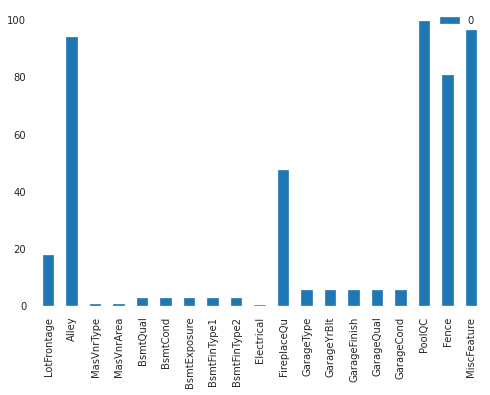

In [8]:
# Percentage of Data missing in each feature column

percnt = (hp.isnull().sum() / hp.shape[0]) * 100
percnt = percnt[percnt >0]
#percnt.sort_values(ascending=True)
pd_percnt = pd.DataFrame(percnt)
pd_percnt.head()
pd_percnt.plot.bar()

In [9]:
cat_feat=hp.select_dtypes(include='object')
cat_feat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [10]:
# Data set with data type of Numerical Features
num_feat = hp.select_dtypes(exclude='object')
num_feat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


<a id=section401></a>
## 4.1 Finding Outliers in Numerical Features

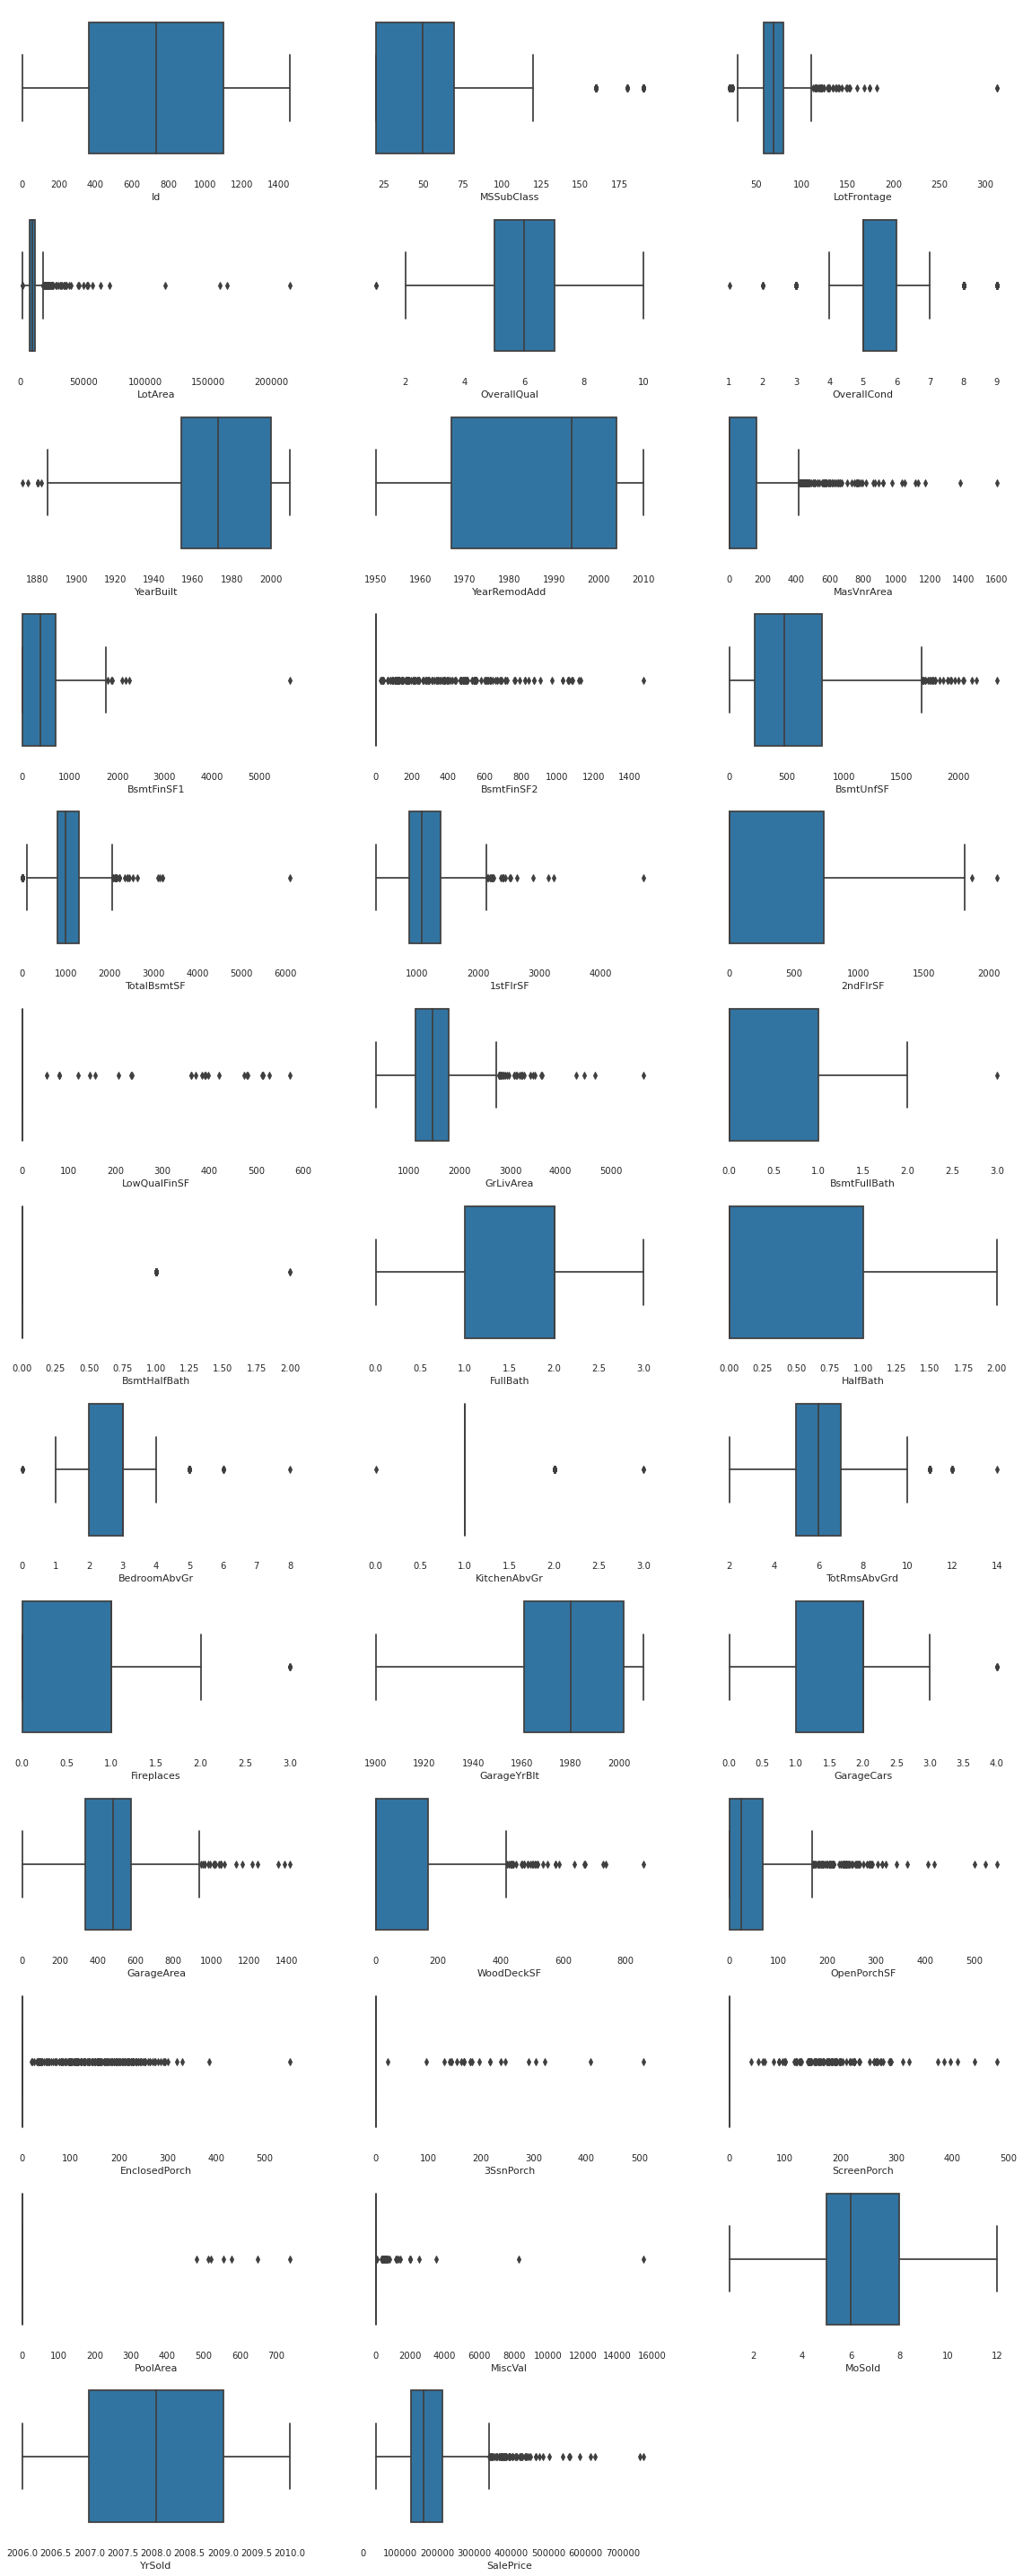

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(20,60), facecolor='white')
cnt =1 
for feature in num_feat:
    ax = plt.subplot(15,3,cnt)
    sns.boxplot(hp[feature])
    plt.xlabel(feature)
    cnt+=1
    
plt.show()

<a id=section402></a>

## 4.2 Correlation 

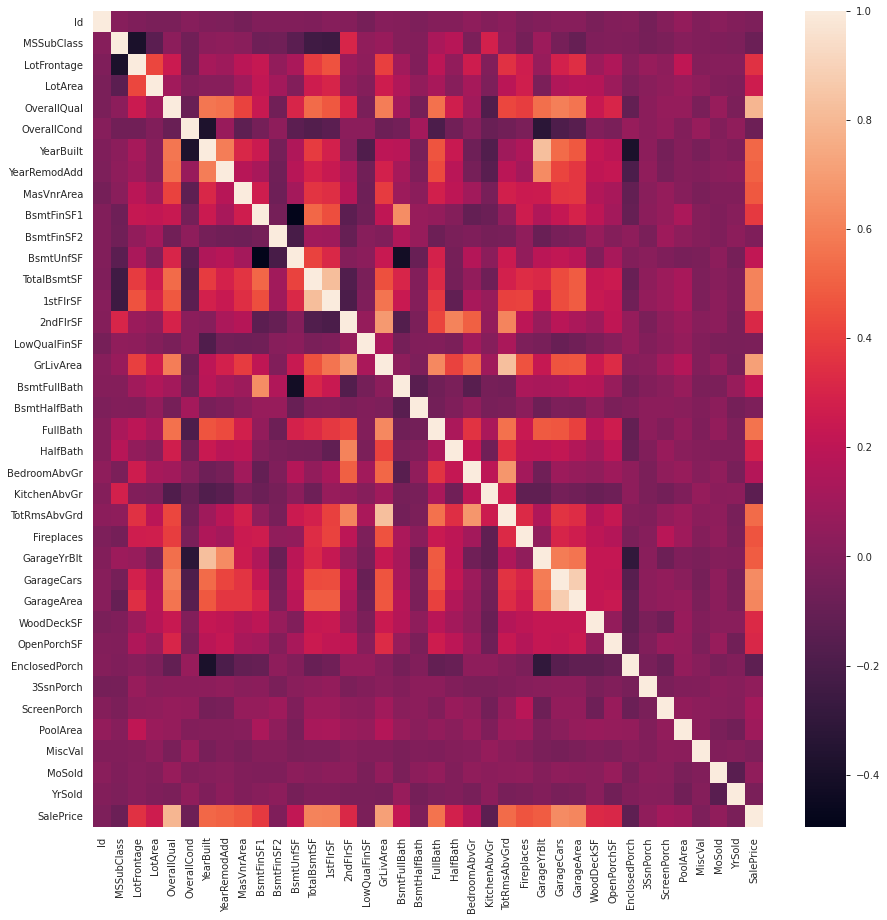

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(hp.corr())

<a id=section403></a>

## 4.3 Visualization of Correlation with Label 

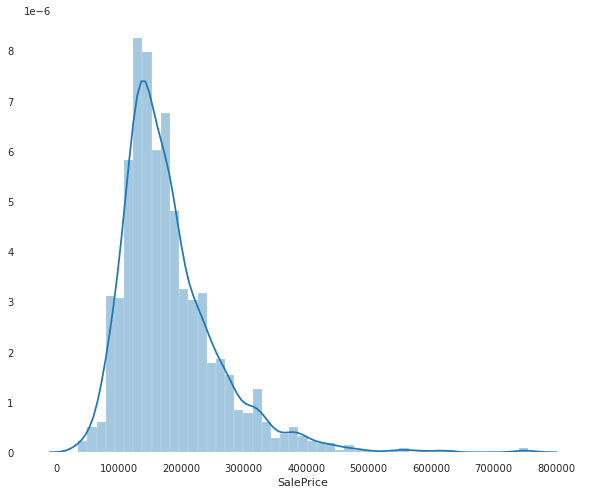

In [13]:
plt.figure(figsize=(10,8))
sns.distplot(hp['SalePrice'], )

### SalePrice is Right Skewed, meaning there could be more info in outliers.

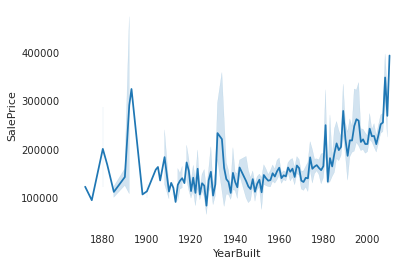

In [14]:
sns.lineplot(x=hp['YearBuilt'], y=hp['SalePrice'])

### Interestingly, Sales Price of few houses are high though they are built Old. They could be having unique features triggering this high value.

In [15]:
hp['how_old']= 2020-hp['YearBuilt']
hp['last_ren']= 2020 - hp['YearRemodAdd']

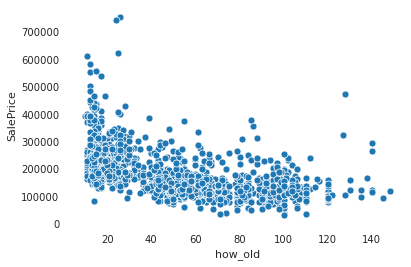

In [16]:
sns.scatterplot(hp['how_old'], hp['SalePrice'])

### This brings a better view of high slaes price basing on how old a property is. However, there are outliers.

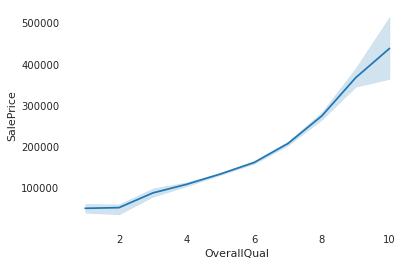

In [17]:
sns.lineplot(x=hp['OverallQual'], y=hp['SalePrice'])

### This behaviour is as expected. Higher the overall Qualification score, higher the sales price of the house.

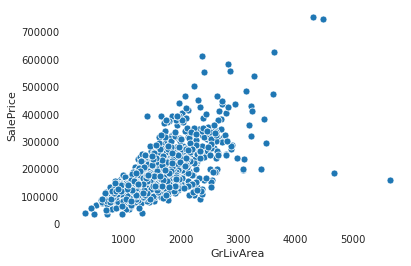

In [18]:
sns.scatterplot(hp['GrLivArea'], hp['SalePrice'])

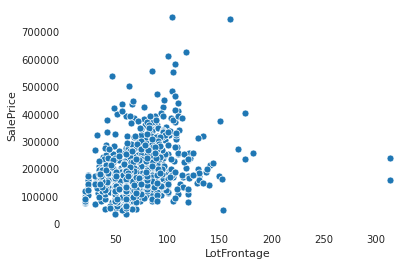

In [19]:
sns.scatterplot(hp['LotFrontage'], hp['SalePrice'])

### There are outliers here. Also, Few with less Frontage also high sales price.

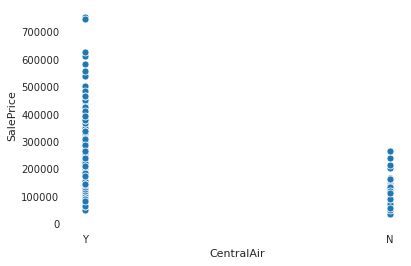

In [20]:
sns.scatterplot(hp['CentralAir'], hp['SalePrice'])

### Pretty obvious that sales price is high for the houses with centralised Air conditioning.

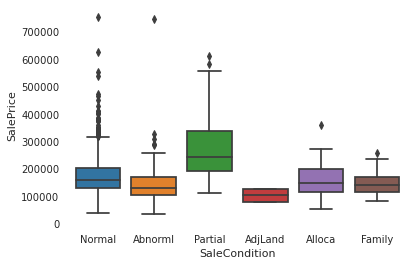

In [21]:
sns.boxplot(x='SaleCondition', y='SalePrice', data =hp)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

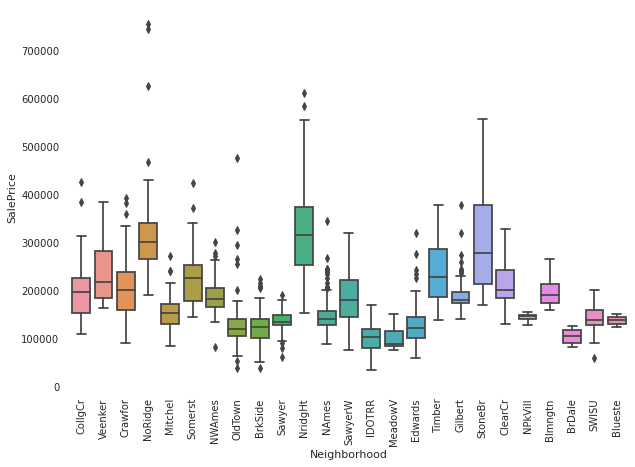

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Neighborhood', y='SalePrice', data = hp)
plt.xticks(rotation=90)

<a id=section5></a>
## 5. Feature Engineering

As per above observations, there are feature columns like Alley, PoolQC, MiscFeat where >95% of data is Zeros, Few columns giving redundant info like Qulity & Condition which are strongly correlated. These types of columns are grouped to drop from the dataset in the further analysis.

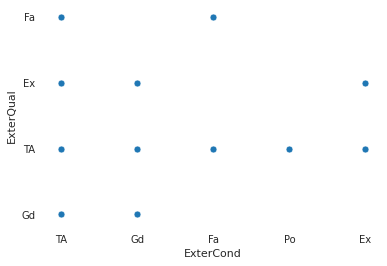

In [23]:
#sns.scatterplot(y='OverallQual', x='OverallCond', data=hp)
#hp['OverallQual'].corr(hp['OverallCond'])
sns.scatterplot(y='ExterQual', x='ExterCond', data=hp)
#hp['ExterQual'].corr(hp['ExterCond'])

In [24]:
hp['TotalSF'] = hp['TotalBsmtSF'] + hp['1stFlrSF'] + hp['2ndFlrSF']
hp['Total_sqr_footage'] = (hp['BsmtFinSF1'] + hp['BsmtFinSF2'] + hp['1stFlrSF'] + hp['2ndFlrSF'])
hp['Total_Bathrooms'] = (hp['FullBath'] + (0.5 * hp['HalfBath']) + hp['BsmtFullBath'] + (0.5 * hp['BsmtHalfBath']))
hp['Total_porch_sf'] = (hp['OpenPorchSF'] + hp['3SsnPorch'] + hp['EnclosedPorch'] + hp['ScreenPorch'] + hp['WoodDeckSF'])

In [25]:
drop_cols = ['Id','Alley','Condition1', 'Condition2','BldgType', 'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','BsmtExposure','BsmtFinSF1','BsmtFinType2','Heating','GarageType','GarageYrBlt','GarageFinish','GarageCars','MiscFeature','PoolQC','Fence','FireplaceQu','YearBuilt','YearRemodAdd','Utilities','MasVnrType','MasVnrArea','BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','Street', 'LandSlope', 'Neighborhood', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'GarageCond', 'PavedDrive']

In [26]:
hp1=hp.drop(columns=drop_cols, axis=1)

### Imputing the missing values using Mean and Mode based on datatype of the column.

In [27]:
hp1['LotFrontage'].fillna(hp1['LotFrontage'].mean(), inplace=True)
cols_mode = ['BsmtCond', 'Electrical', 'GarageQual']
for colm in cols_mode:
    hp1[colm].fillna(hp1[colm].mode()[0], inplace=True)

In [28]:
hp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   object 
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   LotShape           1460 non-null   object 
 5   LandContour        1460 non-null   object 
 6   LotConfig          1460 non-null   object 
 7   OverallQual        1460 non-null   int64  
 8   OverallCond        1460 non-null   int64  
 9   ExterQual          1460 non-null   object 
 10  BsmtCond           1460 non-null   object 
 11  BsmtUnfSF          1460 non-null   int64  
 12  TotalBsmtSF        1460 non-null   int64  
 13  HeatingQC          1460 non-null   object 
 14  CentralAir         1460 non-null   object 
 15  Electrical         1460 non-null   object 
 16  1stFlrSF           1460 

In [29]:
mylist_cat = list(hp1.select_dtypes(include=['object']).columns)
print(mylist_cat)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'ExterQual', 'BsmtCond', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageQual', 'SaleType', 'SaleCondition']


In [30]:
hp1_dummy = pd.get_dummies(hp1, columns=mylist_cat, drop_first=True)

In [31]:
hp1_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1460 non-null   int64  
 1   LotFrontage            1460 non-null   float64
 2   LotArea                1460 non-null   int64  
 3   OverallQual            1460 non-null   int64  
 4   OverallCond            1460 non-null   int64  
 5   BsmtUnfSF              1460 non-null   int64  
 6   TotalBsmtSF            1460 non-null   int64  
 7   1stFlrSF               1460 non-null   int64  
 8   2ndFlrSF               1460 non-null   int64  
 9   GrLivArea              1460 non-null   int64  
 10  BsmtFullBath           1460 non-null   int64  
 11  BsmtHalfBath           1460 non-null   int64  
 12  FullBath               1460 non-null   int64  
 13  HalfBath               1460 non-null   int64  
 14  BedroomAbvGr           1460 non-null   int64  
 15  Kitc

In [32]:
def lr(car_dummy):
    import pandas as pd
    Q1 = car_dummy.quantile(0.02)
    Q3 = car_dummy.quantile(0.98)
    Q_diff = Q3 - Q1
    print("Inter quantile range is:\n", Q_diff)
    car_out = car_dummy[~((car_dummy < Q1)|(car_dummy > Q3)).any(axis=1)]
    print(car_dummy[((car_dummy < Q1)|(car_dummy > Q3)).any(axis=1)])
    return car_out
hp1_dummy = lr(hp1_dummy)
print (hp1_dummy)


Inter quantile range is:
 MSSubClass                 168.20
LotFrontage                 96.82
LotArea                  23126.88
OverallQual                  5.00
OverallCond                  5.00
                           ...   
SaleCondition_AdjLand        0.00
SaleCondition_Alloca         0.00
SaleCondition_Family         0.00
SaleCondition_Normal         1.00
SaleCondition_Partial        1.00
Length: 86, dtype: float64
      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  BsmtUnfSF  \
5             50    85.000000    14115            5            5         64   
7             60    70.049958    10382            7            6        216   
8             50    51.000000     6120            7            5        952   
9            190    50.000000     7420            5            6        140   
11            60    85.000000    11924            9            5        177   
...          ...          ...      ...          ...          ...        ...   
1450          90    

In [33]:
hp1_dummy.shape

(925, 86)

<a id=section6></a>
# 6. Training the Model

In [34]:
X = pd.DataFrame()
X = hp1_dummy.drop(['SalePrice'], axis=1)

In [35]:
X.shape

(925, 85)

In [36]:
y= pd.DataFrame()
y['saleprice'] = hp1_dummy['SalePrice']

In [37]:
y.shape

(925, 1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [39]:
print(X_train.shape)
print(y_train.shape)

(740, 85)
(740, 1)


In [40]:
print(X_test.shape)
print(y_test.shape)

(185, 85)
(185, 1)


In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [42]:
linreg.fit(X_train, y_train)

LinearRegression()

In [43]:
print('Intercept:',linreg.intercept_)                                            
print('Coefficients:',linreg.coef_)

Intercept: [177586.85265379]
Coefficients: [[-4.96818937e+01  1.64942957e+02  8.81798044e-01  1.04286391e+04
   4.69118695e+03 -3.49480229e+00  1.07674352e+01 -1.24727105e+00
   1.85553758e+00  3.29373056e+01  7.09177788e+02 -2.98301813e+03
   2.62786806e+03 -2.47068007e+03 -3.65498943e+03 -2.43424127e+04
  -7.94134531e+02  2.13030725e+03  2.64298055e+01 -4.38844818e+00
  -7.68510276e+00 -1.19563181e+00  2.23912703e+02 -7.35326508e+01
  -2.65776411e+02 -1.48321058e+02  1.13757013e+01  1.48705034e+01
   6.10196744e+02  2.01864347e+01  5.04499295e+03 -9.09494702e-12
  -1.93030068e+03 -3.11469228e+03 -2.60980971e+03  3.18323146e-11
  -1.38208055e+03  1.05210269e+04 -1.36036574e+03 -7.97825912e+03
   2.17648199e+03 -3.57080988e+03  3.81987775e-11  9.24346495e+02
   5.22959454e-12 -3.07605921e+04 -3.59403855e+04  3.35538312e+03
   2.18278728e-11  6.59719657e+03 -3.51474340e+03 -2.24085784e+03
   6.13908924e-12 -3.17621066e+03 -7.88078875e+03  0.00000000e+00
   3.63797881e-12 -3.63797881e-12

<a id=section7></a>
# 7. Evaluating the Model

In [44]:
y_pred_train = linreg.predict(X_train)
pred_train = pd.DataFrame(y_pred_train)
pred_train.columns = ['pred_sp']
pred_train.head()

,pred_sp
0,216453.617875
1,97103.663218
2,171475.377554
3,111728.821525
4,331427.572256


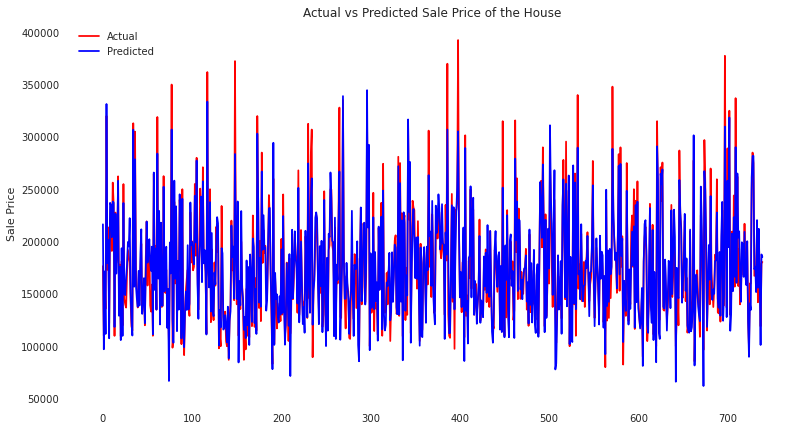

In [45]:
def plot_data(y_test, y_pred):
    plt.figure(figsize=(13,7))
    plt.plot(y_test.values, label='Actual', c='r')
    plt.plot(y_pred, label='Predicted', c='b')
    plt.title('Actual vs Predicted Sale Price of the House')
    plt.ylabel('Sale Price')
    plt.legend()
plot_data(y_train, pred_train)

In [46]:
y_pred_test = linreg.predict(X_test)
pred_test = pd.DataFrame(y_pred_test)
pred_test.columns = ['pred_sp']
pred_test.head()

,pred_sp
0,167448.157667
1,305222.092433
2,246622.909915
3,137998.802059
4,187901.464796


In [47]:
from sklearn import metrics
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 302852592.18394774
MSE for test set is 377814909.5704728


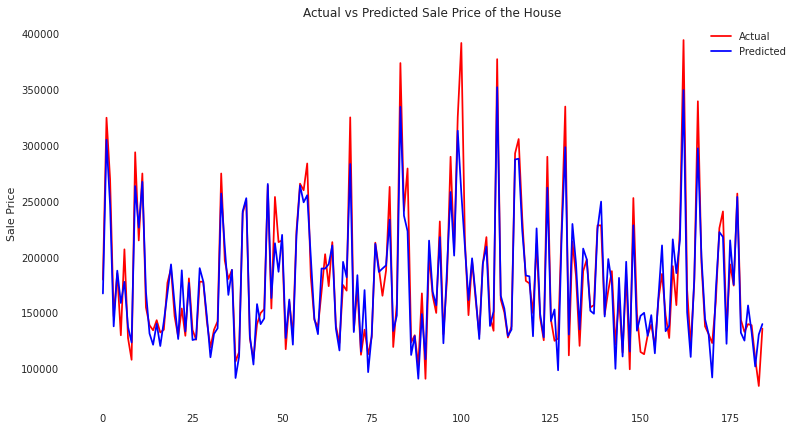

In [48]:
plot_data(y_test, pred_test)

In [49]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 17402.660491544037
RMSE for test set is 19437.46150016696
